##### Contexte : 

Quantifier et qualifier le traitement médiatique des enjeux écologiques et fournir des chiffres pour objectiver le dialogue avec les médias

- Analyser toute page : lemonde.fr

#### Import des librairies

In [2]:
# Import des librairies
import glob,re,os
from pathlib import Path
import pandas as pd 
import numpy as np
import math
from numpy import arange
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Pour les warnings
import warnings
warnings.filterwarnings('ignore')
# Pour le tritement de texte
import nltk
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [3]:
#Modification des paramètres d'affichages des colonnes, lignes et largeurs des colonnes pour obtenir le 
#plus d'informations
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', None)
pd.set_option('float_format',lambda x: "%.4f" % x)

In [4]:
# appel des fonctions necessaires
%run functions.py

In [49]:
dir_data1 = "../Projet_6_examples/lemonde"

print("Liste des fichiers :")
for file in os.listdir(dir_data1):
    print("-",file)

Liste des fichiers :
- 20230215.parquet
- 20230101.parquet
- 20230111.parquet
- 20230118.parquet
- 20230108.parquet
- 20230127.parquet
- 20230109.parquet
- 20230119.parquet
- .DS_Store
- 20230126.parquet
- 20230214.parquet
- 20230204.parquet
- 20230110.parquet
- 20230220.parquet
- 20230124.parquet
- 20230102.parquet
- 20230112.parquet
- 20230206.parquet
- 20230216.parquet
- 20230113.parquet
- 20230103.parquet
- 20230217.parquet
- 20230207.parquet
- 20230125.parquet
- 20230120.parquet
- 20230130.parquet
- 20230129.parquet
- 20230106.parquet
- 20230116.parquet
- 20230202.parquet
- 20230212.parquet
- 20230128.parquet
- 20230117.parquet
- 20230107.parquet
- 20230213.parquet
- 20230203.parquet
- 20230131.parquet
- 20230121.parquet
- 20230201.parquet
- 20230211.parquet
- 20230105.parquet
- 20230115.parquet
- 20230123.parquet
- 20230218.parquet
- 20230208.parquet
- 20230122.parquet
- 20230209.parquet
- 20230210.parquet
- 20230114.parquet
- 20230104.parquet


In [33]:
dir_data2 = "../Projet_6_examples/lefigaro"

- Load data:

In [103]:
def load_data(dir_data):
    for f in dir_data:
        df = pd.read_parquet(dir_data)
       
    return df

In [104]:
df=load_data(dir_data1)
df.head()

url  \
64318.0000                                                             https://www.lemonde.fr/disparitions/article/2022/12/31/barbara-walters-legende-de-la-television-americaine-est-morte-a-93-ans_6156166_3382.html   
64319.0000                                                        https://www.lemonde.fr/international/article/2022/12/31/entre-la-syrie-et-la-turquie-un-premier-pas-officiel-vers-un-rapprochement_6156164_3210.html   
64320.0000                               https://www.lemonde.fr/argent/article/2022/12/31/passoires-thermiques-timbres-smic-gaz-carburant-ce-qui-change-le-1er-janvier-pour-le-budget-des-menages_6156161_1657007.html   
64321.0000      https://www.lemonde.fr/idees/article/2022/12/31/en-guyane-la-transition-energetique-ne-se-fera-pas-en-niant-les-droits-des-peuples-autochtones-et-en-saccageant-la-foret-amazonienne_6156169_3232.html   
64322.0000  https://www.lemonde.fr/idees/article/2022/12/31/mort-de-mahsa-amini-la-seule-maniere-de-mettre-fin-a-la-crise-en-iran-est-d-en-finir-avec-l-intervention-des-religieux-dans-la-politique_6156168_3232.html   

            news news_publication publication_name publication_language  \
64318.0000  None             None         Le Monde                   fr   
64319.0000  None             None         Le Monde                   fr   
64320.0000  None             None         Le Monde                   fr   
64321.0000  None             None         Le Monde                   fr   
64322.0000  None             None         Le Monde                   fr   

           news_publication_date  \
64318.0000   2022-12-31 10:00:26   
64319.0000   2022-12-31 14:43:55   
64320.0000   2022-12-31 06:01:39   
64321.0000   2022-12-31 08:00:20   
64322.0000   2022-12-31 08:00:10   

                                                                                                                                                news_title  \
64318.0000                                                                        Barbara Walters, légende de la télévision américaine, est morte à 93 ans   
64319.0000                                                                     Entre la Syrie et la Turquie, un premier pas officiel vers un rapprochement   
64320.0000                                   Passoires thermiques, timbres, smic, gaz, carburant : ce qui change le 1er janvier pour le budget des ménages   
64321.0000       En Guyane, « la transition énergétique ne se fera pas en niant les droits des peuples autochtones et en saccageant la forêt amazonienne »   
64322.0000  Mort de Mahsa Amini : « La seule manière de mettre fin à la crise en Iran est d’en finir avec l’intervention des religieux dans la politique »   

           news_keywords image  \
64318.0000          None  None   
64319.0000          None  None   
64320.0000          None  None   
64321.0000          None  None   
64322.0000          None  None   

                                                                                                                                                image_loc  \
64318.0000  https://img.lemde.fr/2022/12/31/307/0/2852/1426/1440/720/60/0/2aefa65_6ecc96ea1de147f3a8667f420f8ca74a-0-4957a456686b4458a6dda828748cb38c.jpg   
64319.0000                                       https://img.lemde.fr/2022/12/30/273/0/3277/1638/1440/720/60/0/eab1351_1672390913048-ap22203813165385.jpg   
64320.0000                              https://img.lemde.fr/2022/12/29/0/0/12000/6000/1440/720/60/0/c2dc5d0_1672331682749-080-hl-hpassarello-1045946.jpg   
64321.0000                           https://img.lemde.fr/2021/05/24/118/0/1600/800/1440/720/60/0/bc641a8_712450648-09-tgy7363-tanguystoeckle-preview.jpg   
64322.0000                                               https://img.lemde.fr/2022/10/08/291/0/3500/1750/1440/720/60/0/73acbf5_fw1-iran-women-0918-11.jpg   

                                                                                                                                         

In [12]:
df.shape

(6106, 26)

In [13]:
df.columns

Index(['url', 'news', 'news_publication', 'publication_name',
       'publication_language', 'news_publication_date', 'news_title',
       'news_keywords', 'image', 'image_loc', 'image_caption', 'sitemap',
       'etag', 'sitemap_last_modified', 'sitemap_size_mb', 'download_date',
       'media', 'section', 'changefreq', 'news_access', 'image_title',
       'lastmod', 'news_genres', 'priority', 'download_date_last',
       'media_type'],
      dtype='object')

In [14]:
df.url.iloc[:1]

64318.0000    https://www.lemonde.fr/disparitions/article/2022/12/31/barbara-walters-legende-de-la-television-americaine-est-morte-a-93-ans_6156166_3382.html
Name: url, dtype: object

#### Inspection des données

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2912 entries, 64318 to 67229
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   url                    2912 non-null   object             
 1   news                   0 non-null      object             
 2   news_publication       0 non-null      object             
 3   publication_name       2912 non-null   object             
 4   publication_language   2912 non-null   object             
 5   news_publication_date  2912 non-null   datetime64[ns]     
 6   news_title             2912 non-null   object             
 7   news_keywords          0 non-null      object             
 8   image                  0 non-null      object             
 9   image_loc              2901 non-null   object             
 10  image_caption          2242 non-null   object             
 11  sitemap                2912 non-null   object      

- Preprocess:

In [111]:
def preprocess(df):
    #Extraction de la section: cette colonne est sous forme de liste 
    df["section"]=df["section"].str[0]
    # colonnes inutiles
    col_to_drop=["priority","changefreq","image","image_title","news","news_access","news_genres","news_keywords",
             "news_publication","publication_language","image_loc","sitemap","media_type","media_type",
             "sitemap_size_mb","sitemap_last_modified","publication_language","sitemap","publication_name",
             "download_date_last","lastmod"]
    df.drop(col_to_drop,axis=1,inplace=True)
    # concaténation titre et texte d'image
    df["image_caption"].fillna(" ",inplace = True)
    df["text"]=df["news_title"]+" "+df["image_caption"]
    return df

In [112]:
df=preprocess(df)

In [68]:
summary(df)

Data shape: (6106, 9)
___________________________
Data types:
object            7
datetime64[ns]    2
Name: types, dtype: int64
___________________________


types  counts  uniques  nulls
download_date          datetime64[ns]    6106       49      0
etag                           object    6106       49      0
image_caption                  object    6106     3829      0
media                          object    6106        1      0
news_publication_date  datetime64[ns]    6106     5213      0
news_title                     object    6106     4980      0
section                        object    6106       50      0
text                           object    6106     5017      0
url                            object    6106     4909      0

- Valeurs manquantes

In [69]:
missing_values(df)

Variable  nan     %nan
0                    url    0  0.0000%
1  news_publication_date    0  0.0000%
2             news_title    0  0.0000%
3          image_caption    0  0.0000%
4                   etag    0  0.0000%
5          download_date    0  0.0000%
6                  media    0  0.0000%
7                section    0  0.0000%
8                   text    0  0.0000%

In [26]:
df.head()

url  \
0                                                             https://www.lemonde.fr/disparitions/article/2022/12/31/barbara-walters-legende-de-la-television-americaine-est-morte-a-93-ans_6156166_3382.html   
1                                                        https://www.lemonde.fr/international/article/2022/12/31/entre-la-syrie-et-la-turquie-un-premier-pas-officiel-vers-un-rapprochement_6156164_3210.html   
2                               https://www.lemonde.fr/argent/article/2022/12/31/passoires-thermiques-timbres-smic-gaz-carburant-ce-qui-change-le-1er-janvier-pour-le-budget-des-menages_6156161_1657007.html   
3      https://www.lemonde.fr/idees/article/2022/12/31/en-guyane-la-transition-energetique-ne-se-fera-pas-en-niant-les-droits-des-peuples-autochtones-et-en-saccageant-la-foret-amazonienne_6156169_3232.html   
4  https://www.lemonde.fr/idees/article/2022/12/31/mort-de-mahsa-amini-la-seule-maniere-de-mettre-fin-a-la-crise-en-iran-est-d-en-finir-avec-l-intervention-des-religieux-dans-la-politique_6156168_3232.html   

  news_publication_date  \
0   2022-12-31 10:00:26   
1   2022-12-31 14:43:55   
2   2022-12-31 06:01:39   
3   2022-12-31 08:00:20   
4   2022-12-31 08:00:10   

                                                                                                                                       news_title  \
0                                                                        Barbara Walters, légende de la télévision américaine, est morte à 93 ans   
1                                                                     Entre la Syrie et la Turquie, un premier pas officiel vers un rapprochement   
2                                   Passoires thermiques, timbres, smic, gaz, carburant : ce qui change le 1er janvier pour le budget des ménages   
3       En Guyane, « la transition énergétique ne se fera pas en niant les droits des peuples autochtones et en saccageant la forêt amazonienne »   
4  Mort de Mahsa Amini : « La seule manière de mettre fin à la crise en Iran est d’en finir avec l’intervention des religieux dans la politique »   

                                                                                                                                                                                image_caption  \
0                                                                                                                              Barbara Walters, le 7 octobre 2014, à l’université de Harvard.   
1  Le ministre russe de la défense, Sergueï Choïgou, à gauche, et son homologue turc, Hulusi Akar, se serrent la main lors d’une réunion à Istanbul, en Turquie, le vendredi 22 juillet 2022.   
2                                                                                                     Devant une borne de rechargement du passe Navigo, dans le métro parisien, en mars 2020.   
3                                                                                                                               Dans la réserve naturelle nationale des Nouragues, en Guyane.   
4                                                                                                                                                                                        None   

                                 etag       download_date    media  \
0  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:48:03  lemonde   
1  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:48:03  lemonde   
2  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:48:03  lemonde   
3  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:48:03  lemonde   
4  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:48:03  lemonde   

         section  
0   disparitions  
1  international  
2         argent  
3          idees  
4          idees

Les colonnes qui nous intéressent : news_title, section, image_caption ?

In [19]:
df.groupby(["media","section"]).count()

url  news_publication_date  news_title  \
media   section                                                          
lemonde actualite-medias         12                     12          12   
        afrique                 385                    385         385   
        argent                   78                     78          78   
        blog-mediateur            7                      7           7   
        campus                   79                     79          79   
        cinema                   14                     14          14   
        climat                    4                      4           4   
        critique-litteraire       1                      1           1   
        culture                 498                    498         498   
        disparitions             90                     90          90   
        economie                595                    595         595   
        education                 6                      6           6   
        emploi                   46                     46          46   
        energies                  7                      7           7   
        football                 23                     23          23   
        guides-d-achat            4                      4           4   
        idees                   615                    615         615   
        international           983                    983         983   
        le-jazz-et-la-salsa       1                      1           1   
        le-monde-des-religions   18                     18          18   
        le-monde-et-vous          4                      4           4   
        le-monde-evenements       4                      4           4   
        le-monde-passe-a-table   48                     48          48   
        les-decodeurs            97                     97          97   
        les-envies-du-monde       1                      1           1   
        les-recettes-du-monde     2                      2           2   
        livres                  148                    148         148   
        m-gastronomie             1                      1           1   
        m-le-mag                127                    127         127   
        m-perso                  86                     86          86   
        m-styles                191                    191         191   
        mondephilatelique        12                     12          12   
        musiques                 10                     10          10   
        pixels                  128                    128         128   
        planete                 222                    222         222   
        podcasts                 53                     53          53   
        police-justice           17                     17          17   
        politique               493                    493         493   
        rugby                     4                      4           4   
        sante                     6                      6           6   
        sciences                137                    137         137   
        series                    7                      7           7   
        smart-cities             10                     10          10   
        societe                 441                    441         441   
        sport                   366                    366         366   
        sports-de-glisse          1                      1           1   
        televisions-radio         8                      8           8   
        tennis                    1                      1           1   
        un-si-proche-orient      10                     10          10   
        videos                    5                      5           5   

                                image_caption  etag  download_date  
media   section                                                     
lemonde actualite-medias                    9

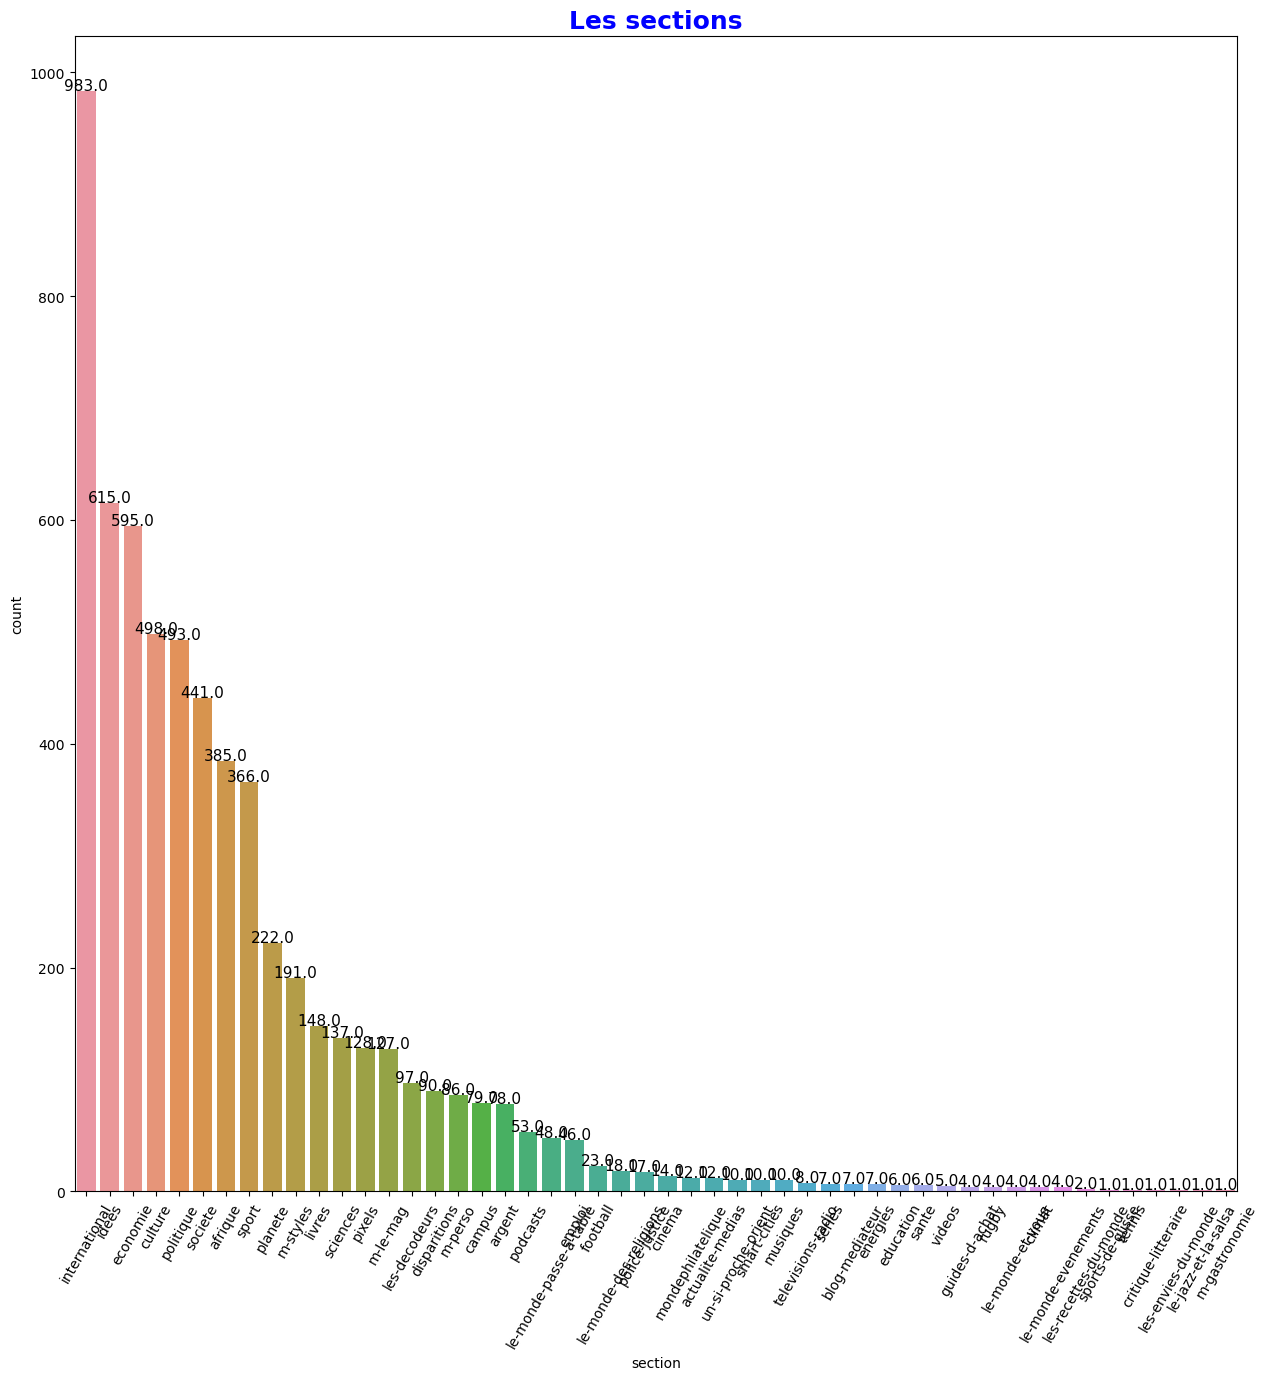

In [21]:
plot_cnt(df,"section","Les sections")

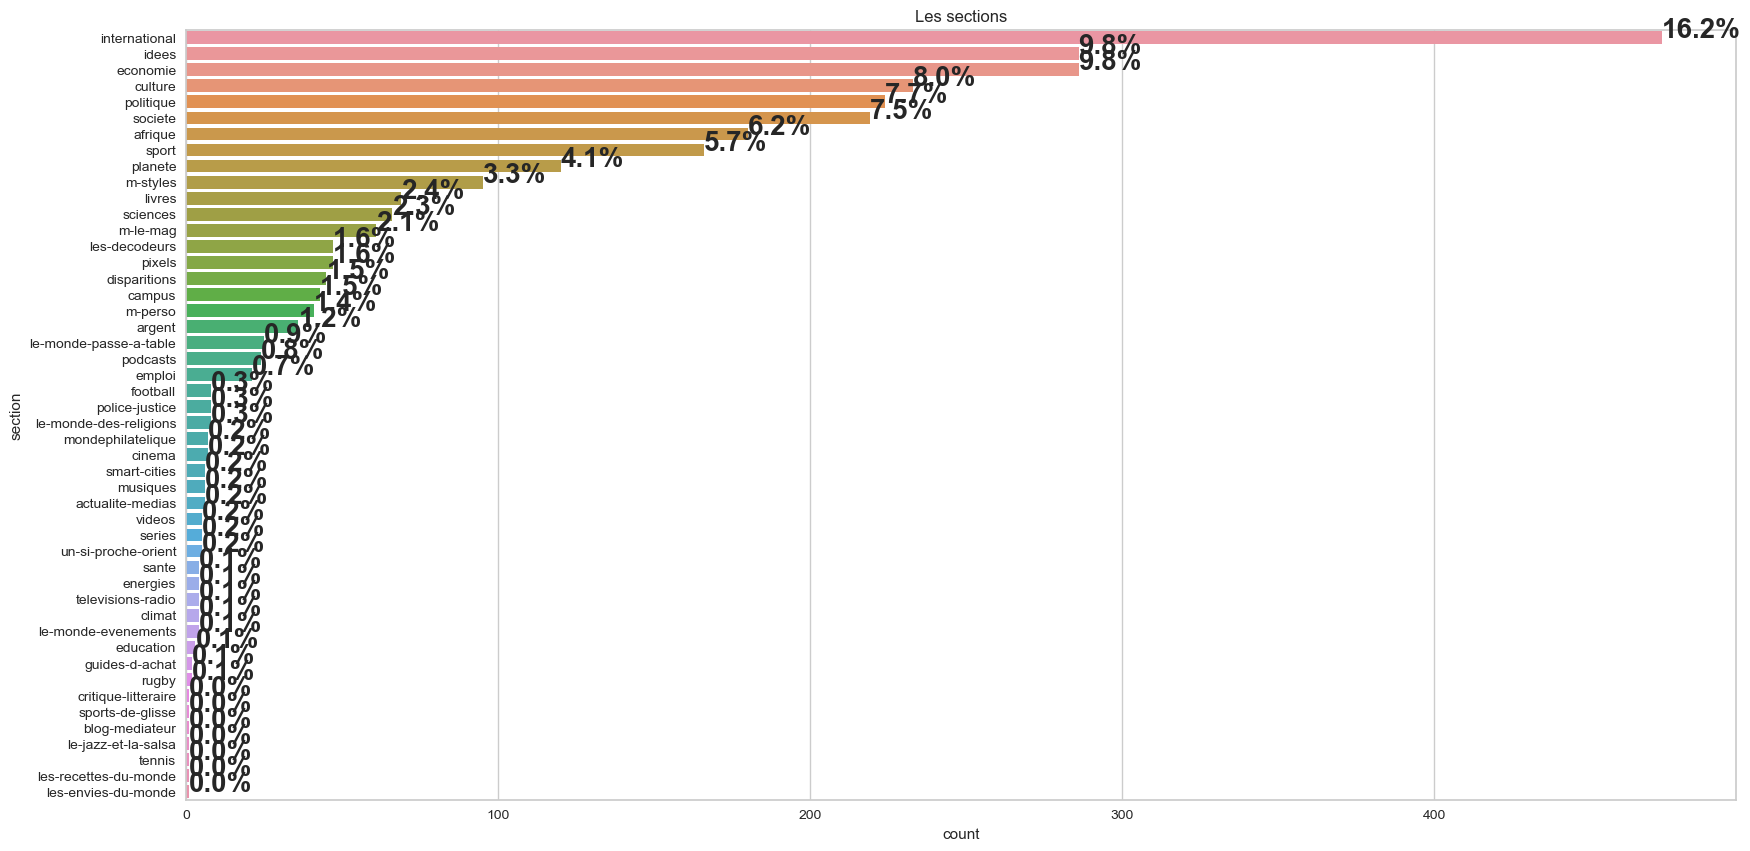

In [49]:
plot_stat(df,"section","Les sections")

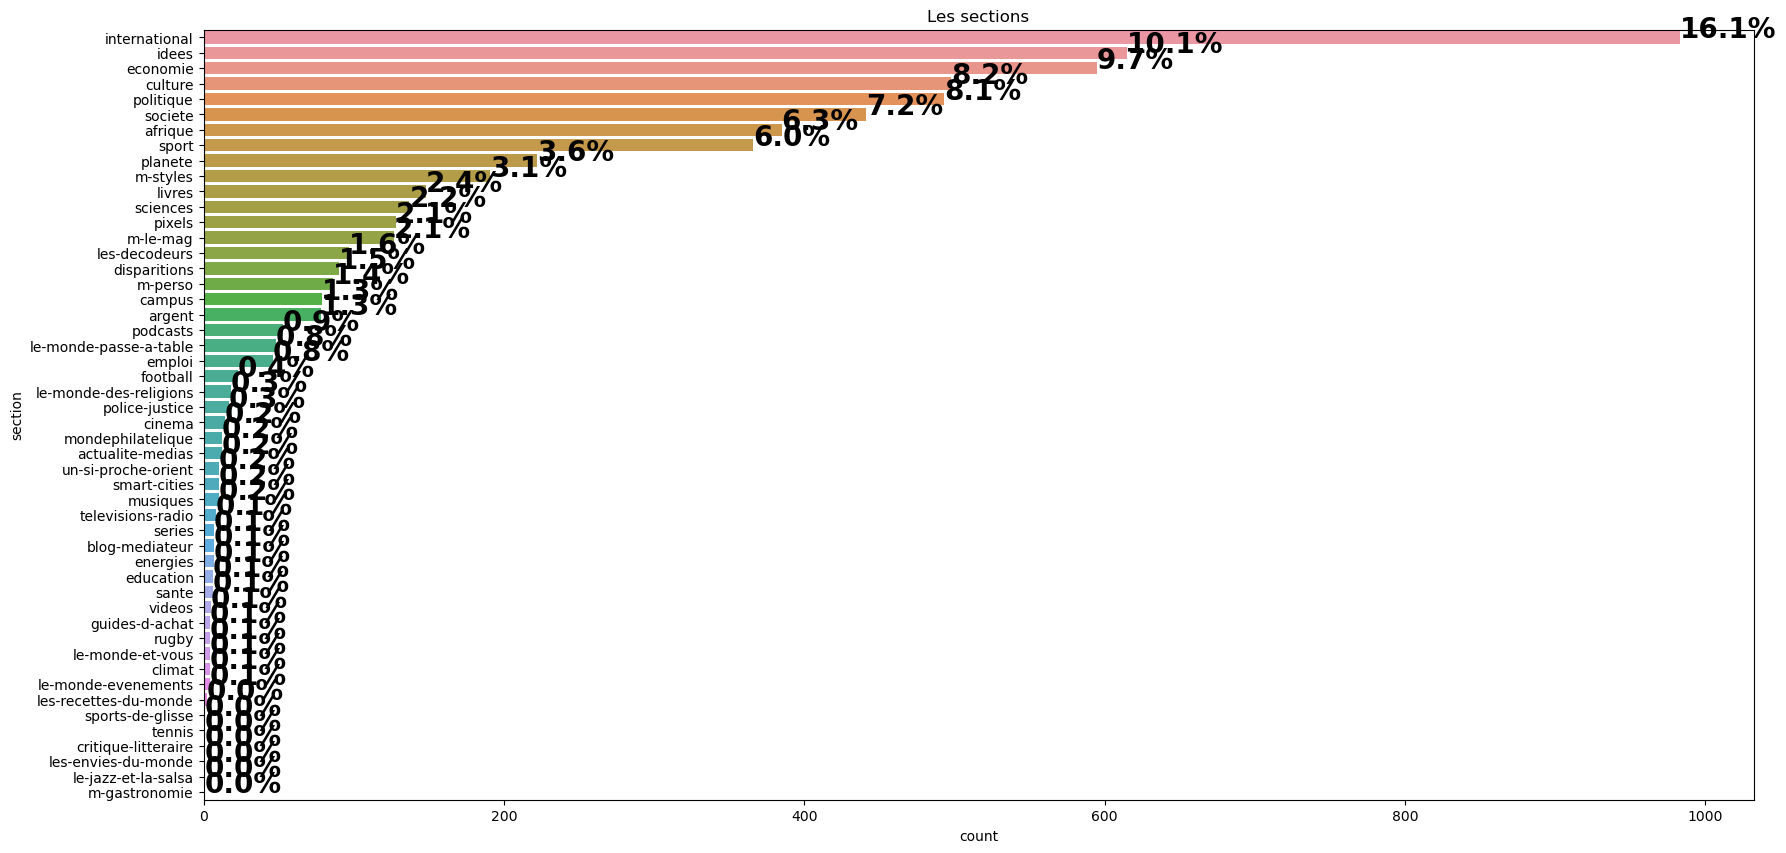

In [207]:

def plot_stat(data, feature, title) : 
    
    ax, fig = plt.subplots(figsize=(20,10)) 
    ax = sns.countplot(y=feature, data=data, order=data[feature].value_counts(ascending=False).index)
    ax.set_title(title)

    for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_width()/len(data["url"]))
                x = p.get_x() + p.get_width()
                y = p.get_y() + p.get_height()/2
                ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold') 
plot_stat(df,"section","Les sections")

In [220]:
df[df.section=="planete"]

url  \
64327.0000                                             https://www.lemonde.fr/planete/article/2022/12/31/du-zero-covid-a-la-brusque-levee-des-restrictions-trois-ans-de-gestion-sanitaire-abrupte-par-la-chine_6156152_3244.html   
64347.0000        https://www.lemonde.fr/planete/article/2022/12/31/a-ungersheim-village-pionnier-de-la-transition-ecologique-l-objectif-d-autonomie-energetique-et-alimentaire-repousse-en-raison-de-la-crise_6156176_3244.html   
64349.0000                      https://www.lemonde.fr/planete/article/2023/01/01/covid-19-en-chine-la-presidence-suedoise-de-l-ue-defend-une-attitude-commune-le-canada-retablit-les-tests-pour-les-voyageurs_6156209_3244.html   
64375.0000                                                                       https://www.lemonde.fr/planete/article/2023/01/01/l-asie-entre-prudence-et-empressement-de-voir-revenir-les-touristes-chinois_6156218_3244.html   
64376.0000                                                    https://www.lemonde.fr/planete/article/2023/01/01/branle-bas-de-combat-a-hongkong-avant-la-reouverture-des-frontieres-avec-la-chine-continentale_6156217_3244.html   
64389.0000                                                  https://www.lemonde.fr/planete/article/2023/01/01/au-royaume-uni-les-ecologistes-d-extinction-rebellion-suspendent-leurs-operations-coups-de-poing_6156254_3244.html   
64440.0000                                                 https://www.lemonde.fr/planete/article/2023/01/02/des-filets-de-peche-biosources-et-biodegradables-pour-eviter-une-catastrophe-pour-la-biodiversite_6156274_3244.html   
64450.0000                                                                                                 https://www.lemonde.fr/planete/article/2023/01/02/le-jetable-dans-les-fast-foods-c-est-presque-fini_6156287_3244.html   
64510.0000                       https://www.lemonde.fr/planete/article/2023/01/03/robert-vautard-climatologue-nous-vivons-depuis-la-toute-fin-de-l-annee-2022-des-conditions-de-temperature-absolument-record_6156396_3244.html   
64537.0000                                                                 https://www.lemonde.fr/planete/article/2023/01/03/beaucoup-de-pluie-peu-de-neige-debut-de-saison-difficile-dans-les-stations-de-ski_6156391_3244.html   
64546.0000                                                                                  https://www.lemonde.fr/planete/article/2023/01/03/l-exploitation-intensive-des-forets-suedoises-remise-en-question_6156381_3244.html   
64555.0000                                                                        https://www.lemonde.fr/planete/article/2023/01/03/en-suede-la-biodiversite-souffre-de-l-exploitation-industrielle-des-forets_6156412_3244.html   
64584.0000                                                                                 https://www.lemonde.fr/planete/article/2023/01/04/la-criminalite-environnementale-un-fleau-en-hausse-et-proteiforme_6156565_3244.html   
64597.0000                                                                           https://www.lemonde.fr/planete/article/2023/01/04/covid-19-imposer-des-tests-aux-voyageurs-issus-de-chine-est-il-justifie_6156549_3244.html   
64618.0000                                                   https://www.lemonde.fr/planete/article/2023/01/04/a-la-reunion-les-tortues-et-oiseaux-marins-revelent-une-soupe-de-plastiques-dans-l-ocean-indien_6156515_3244.html   
64634.0000                                                                             https://www.lemonde.fr/planete/article/2023/01/04/en-france-une-epidemie-de-grippe-de-forte-ampleur-mais-pas-hors-norme_6156532_3244.html   
64653.0000                          https://www.lemonde.fr/planete/article/2023/01/04/covid-19-l-union-europeenne-encourage-fortement-ses-etats-membres-a-imposer-un-test-aux-passagers-en-provenance-de-chine_6156652_3244.html   
64654.0000                                                                  https://www.lemonde.fr/planete/article/20

In [228]:
def plot_(df ):
    df_climat = df.groupby('section').count().reset_index().sort_values(['news_title'], ascending=True)
    df_climat["percent"]=round((df_climat["news_title"]/ len(df["url"])) *100,2)

    fig = px.bar(
        df_climat,
        x="media",
        y="section",
       
        title="Pourcentage de titre d'articles contenant un mot des listes",
        text=df_climat['percent'].apply(lambda x: '{0:1.2f}%'.format(x))
    )
    
    fig.update_layout(
    font=dict(
        size=5,
        # Set the font size here
    ))
    
    fig.show()
plot_(df)

- Combiner news_title et image_caption
- Il y a des données manquantes sur la colonne image_caption
- Imputation

In [24]:
missing_values(df)

Variable  nan     %nan
0                    url    0  0.0000%
1  news_publication_date    0  0.0000%
2             news_title    0  0.0000%
3          image_caption    0  0.0000%
4                   etag    0  0.0000%
5          download_date    0  0.0000%
6                  media    0  0.0000%
7                section    0  0.0000%

In [26]:
df.head()

url  \
64318.0000                                                             https://www.lemonde.fr/disparitions/article/2022/12/31/barbara-walters-legende-de-la-television-americaine-est-morte-a-93-ans_6156166_3382.html   
64319.0000                                                        https://www.lemonde.fr/international/article/2022/12/31/entre-la-syrie-et-la-turquie-un-premier-pas-officiel-vers-un-rapprochement_6156164_3210.html   
64320.0000                               https://www.lemonde.fr/argent/article/2022/12/31/passoires-thermiques-timbres-smic-gaz-carburant-ce-qui-change-le-1er-janvier-pour-le-budget-des-menages_6156161_1657007.html   
64321.0000      https://www.lemonde.fr/idees/article/2022/12/31/en-guyane-la-transition-energetique-ne-se-fera-pas-en-niant-les-droits-des-peuples-autochtones-et-en-saccageant-la-foret-amazonienne_6156169_3232.html   
64322.0000  https://www.lemonde.fr/idees/article/2022/12/31/mort-de-mahsa-amini-la-seule-maniere-de-mettre-fin-a-la-crise-en-iran-est-d-en-finir-avec-l-intervention-des-religieux-dans-la-politique_6156168_3232.html   

           news_publication_date  \
64318.0000   2022-12-31 10:00:26   
64319.0000   2022-12-31 14:43:55   
64320.0000   2022-12-31 06:01:39   
64321.0000   2022-12-31 08:00:20   
64322.0000   2022-12-31 08:00:10   

                                                                                                                                                news_title  \
64318.0000                                                                        Barbara Walters, légende de la télévision américaine, est morte à 93 ans   
64319.0000                                                                     Entre la Syrie et la Turquie, un premier pas officiel vers un rapprochement   
64320.0000                                   Passoires thermiques, timbres, smic, gaz, carburant : ce qui change le 1er janvier pour le budget des ménages   
64321.0000       En Guyane, « la transition énergétique ne se fera pas en niant les droits des peuples autochtones et en saccageant la forêt amazonienne »   
64322.0000  Mort de Mahsa Amini : « La seule manière de mettre fin à la crise en Iran est d’en finir avec l’intervention des religieux dans la politique »   

                                                                                                                                                                                         image_caption  \
64318.0000                                                                                                                              Barbara Walters, le 7 octobre 2014, à l’université de Harvard.   
64319.0000  Le ministre russe de la défense, Sergueï Choïgou, à gauche, et son homologue turc, Hulusi Akar, se serrent la main lors d’une réunion à Istanbul, en Turquie, le vendredi 22 juillet 2022.   
64320.0000                                                                                                     Devant une borne de rechargement du passe Navigo, dans le métro parisien, en mars 2020.   
64321.0000                                                                                                                               Dans la réserve naturelle nationale des Nouragues, en Guyane.   
64322.0000                                                                                                                                                                                               

                                          etag       download_date    media  \
64318.0000  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:48:03  lemonde   
64319.0000  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:48:03  lemonde   
64320.0000  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:48:03  lemonde   
64321.0000  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:48:03  lemonde   
64322.0000  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:48:03  lemonde   

                  section  \
64318.0000   dispar

- Nettoyage de la colonne texte :

In [27]:
# retirer les chiffres et caractères spéciaux
def search_words(text):
    result = re.findall(r'\b[^\d\W]+\b', text)
    
    return " ".join(result)

df['text']=df['text'].apply(lambda x : search_words(x))

In [28]:
df.head()

url  \
64318.0000                                                             https://www.lemonde.fr/disparitions/article/2022/12/31/barbara-walters-legende-de-la-television-americaine-est-morte-a-93-ans_6156166_3382.html   
64319.0000                                                        https://www.lemonde.fr/international/article/2022/12/31/entre-la-syrie-et-la-turquie-un-premier-pas-officiel-vers-un-rapprochement_6156164_3210.html   
64320.0000                               https://www.lemonde.fr/argent/article/2022/12/31/passoires-thermiques-timbres-smic-gaz-carburant-ce-qui-change-le-1er-janvier-pour-le-budget-des-menages_6156161_1657007.html   
64321.0000      https://www.lemonde.fr/idees/article/2022/12/31/en-guyane-la-transition-energetique-ne-se-fera-pas-en-niant-les-droits-des-peuples-autochtones-et-en-saccageant-la-foret-amazonienne_6156169_3232.html   
64322.0000  https://www.lemonde.fr/idees/article/2022/12/31/mort-de-mahsa-amini-la-seule-maniere-de-mettre-fin-a-la-crise-en-iran-est-d-en-finir-avec-l-intervention-des-religieux-dans-la-politique_6156168_3232.html   

           news_publication_date  \
64318.0000   2022-12-31 10:00:26   
64319.0000   2022-12-31 14:43:55   
64320.0000   2022-12-31 06:01:39   
64321.0000   2022-12-31 08:00:20   
64322.0000   2022-12-31 08:00:10   

                                                                                                                                                news_title  \
64318.0000                                                                        Barbara Walters, légende de la télévision américaine, est morte à 93 ans   
64319.0000                                                                     Entre la Syrie et la Turquie, un premier pas officiel vers un rapprochement   
64320.0000                                   Passoires thermiques, timbres, smic, gaz, carburant : ce qui change le 1er janvier pour le budget des ménages   
64321.0000       En Guyane, « la transition énergétique ne se fera pas en niant les droits des peuples autochtones et en saccageant la forêt amazonienne »   
64322.0000  Mort de Mahsa Amini : « La seule manière de mettre fin à la crise en Iran est d’en finir avec l’intervention des religieux dans la politique »   

                                                                                                                                                                                         image_caption  \
64318.0000                                                                                                                              Barbara Walters, le 7 octobre 2014, à l’université de Harvard.   
64319.0000  Le ministre russe de la défense, Sergueï Choïgou, à gauche, et son homologue turc, Hulusi Akar, se serrent la main lors d’une réunion à Istanbul, en Turquie, le vendredi 22 juillet 2022.   
64320.0000                                                                                                     Devant une borne de rechargement du passe Navigo, dans le métro parisien, en mars 2020.   
64321.0000                                                                                                                               Dans la réserve naturelle nationale des Nouragues, en Guyane.   
64322.0000                                                                                                                                                                                               

                                          etag       download_date    media  \
64318.0000  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:48:03  lemonde   
64319.0000  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:48:03  lemonde   
64320.0000  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:48:03  lemonde   
64321.0000  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:48:03  lemonde   
64322.0000  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:48:03  lemonde   

                  section  \
64318.0000   dispar

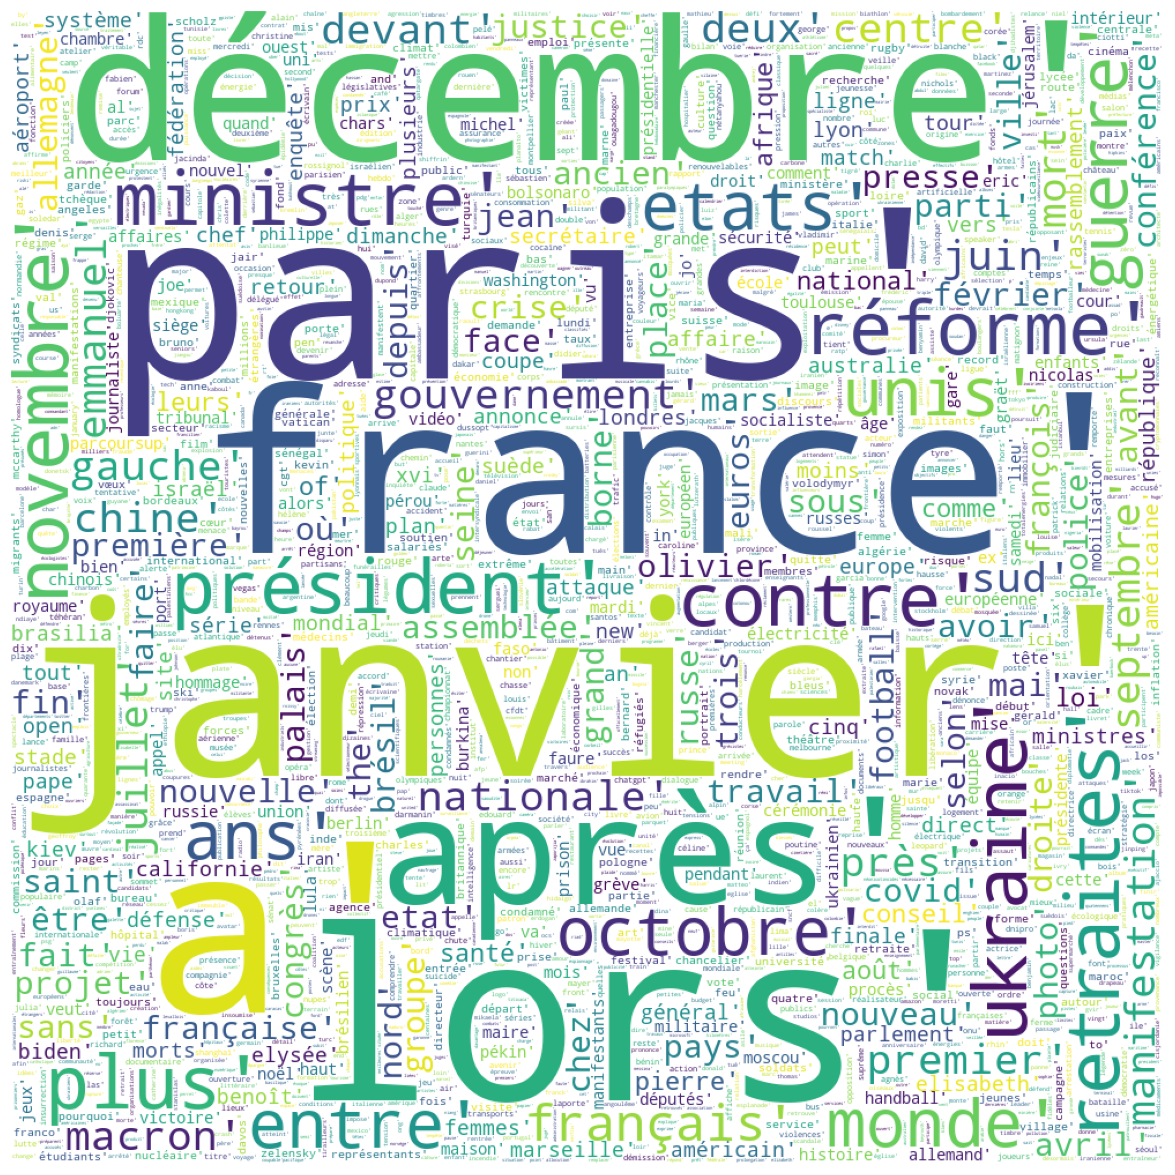

In [71]:
plt.figure(figsize=(15,15))
wordCloudFunction(df,'text',100000)

In [198]:
#df.groupby(["section"]).count()

Recherche par mots clés:

In [231]:
# Liste des mots clés à rechercher et compter

CLIMATE_KW = [
    "planète", 
    "environnement", 
    "crise-climatique",
    "climatique",
    "climat",
    "énergie",
    "gaz",
    " cop27",
    "  cop ",
    "climatique",
    "écologie",
    "CO2",
    "effet de serre",
    "transition énergetique",
    "carbone",
    "sécheresse",
    "methane",
    "GIEC",
    "zéro émission",
    "réchauffement",
    "changement climatique",
    "réchauffement de la planete",
    "réchauffement climatique",
    "réchauffement climatique anthropique",
    "risque climatique",
    "impact climatique",
    "Empreinte carbone",
    "Budget énergétique",
    "énergies renouvelables"
]

In [232]:
politique_KW = ["élections municipales", "législatives","présidentielle","voter","retraite","droit","vote","premier ministre",
                "président","Emmanuel Macron","président de la république","loi","contre","manifestations","La mairie", "le maire",
                "débats à l’assemblée national","débat","réforme","Institutions","étranger","Ukraine"]
                

In [30]:
output = {}
for word in CLIMATE_KW:
    output[word] = df['text'].str.contains(word).sum()
    
print(output)

{'planète': 5, 'environnement': 18, 'crise-climatique': 0, 'climatique': 58, 'climat': 72, 'énergie': 34, 'gaz': 40, ' cop27': 0, '  cop ': 0, 'écologie': 9, 'CO2': 0, 'effet de serre': 2, 'transition énergetique': 0, 'carbone': 11, 'sécheresse': 5, 'methane': 0, 'GIEC': 0, 'zéro émission': 0, 'réchauffement': 6, 'changement climatique': 9, 'réchauffement de la planete': 0, 'réchauffement climatique': 3, 'réchauffement climatique anthropique': 0, 'risque climatique': 0, 'impact climatique': 0, 'Empreinte carbone': 1, 'Budget énergétique': 0, 'énergies renouvelables': 14}


In [31]:
counter_word=df.text.str.findall('|'.join(CLIMATE_KW)).explode().value_counts()
counter_word

gaz                      52
climatique               51
énergie                  38
climat                   26
environnement            18
écologie                 11
carbone                  10
changement climatique    10
réchauffement             6
sécheresse                6
planète                   5
effet de serre            2
Empreinte carbone         1
Name: text, dtype: int64

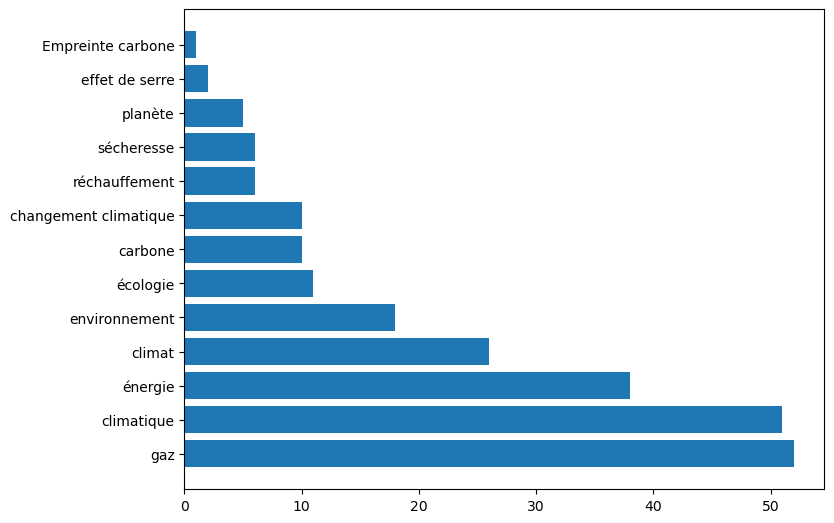

In [35]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax=plt.barh(counter_word.index,counter_word.values)

In [36]:
df["count"]=df["text"].apply(lambda n: len(n.split()))

In [37]:
df.head()

url  \
64318.0000                                                             https://www.lemonde.fr/disparitions/article/2022/12/31/barbara-walters-legende-de-la-television-americaine-est-morte-a-93-ans_6156166_3382.html   
64319.0000                                                        https://www.lemonde.fr/international/article/2022/12/31/entre-la-syrie-et-la-turquie-un-premier-pas-officiel-vers-un-rapprochement_6156164_3210.html   
64320.0000                               https://www.lemonde.fr/argent/article/2022/12/31/passoires-thermiques-timbres-smic-gaz-carburant-ce-qui-change-le-1er-janvier-pour-le-budget-des-menages_6156161_1657007.html   
64321.0000      https://www.lemonde.fr/idees/article/2022/12/31/en-guyane-la-transition-energetique-ne-se-fera-pas-en-niant-les-droits-des-peuples-autochtones-et-en-saccageant-la-foret-amazonienne_6156169_3232.html   
64322.0000  https://www.lemonde.fr/idees/article/2022/12/31/mort-de-mahsa-amini-la-seule-maniere-de-mettre-fin-a-la-crise-en-iran-est-d-en-finir-avec-l-intervention-des-religieux-dans-la-politique_6156168_3232.html   

           news_publication_date  \
64318.0000   2022-12-31 10:00:26   
64319.0000   2022-12-31 14:43:55   
64320.0000   2022-12-31 06:01:39   
64321.0000   2022-12-31 08:00:20   
64322.0000   2022-12-31 08:00:10   

                                                                                                                                                news_title  \
64318.0000                                                                        Barbara Walters, légende de la télévision américaine, est morte à 93 ans   
64319.0000                                                                     Entre la Syrie et la Turquie, un premier pas officiel vers un rapprochement   
64320.0000                                   Passoires thermiques, timbres, smic, gaz, carburant : ce qui change le 1er janvier pour le budget des ménages   
64321.0000       En Guyane, « la transition énergétique ne se fera pas en niant les droits des peuples autochtones et en saccageant la forêt amazonienne »   
64322.0000  Mort de Mahsa Amini : « La seule manière de mettre fin à la crise en Iran est d’en finir avec l’intervention des religieux dans la politique »   

                                                                                                                                                                                         image_caption  \
64318.0000                                                                                                                              Barbara Walters, le 7 octobre 2014, à l’université de Harvard.   
64319.0000  Le ministre russe de la défense, Sergueï Choïgou, à gauche, et son homologue turc, Hulusi Akar, se serrent la main lors d’une réunion à Istanbul, en Turquie, le vendredi 22 juillet 2022.   
64320.0000                                                                                                     Devant une borne de rechargement du passe Navigo, dans le métro parisien, en mars 2020.   
64321.0000                                                                                                                               Dans la réserve naturelle nationale des Nouragues, en Guyane.   
64322.0000                                                                                                                                                                                               

                                          etag       download_date    media  \
64318.0000  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:48:03  lemonde   
64319.0000  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:48:03  lemonde   
64320.0000  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:48:03  lemonde   
64321.0000  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:48:03  lemonde   
64322.0000  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:48:03  lemonde   

                  section  \
64318.0000   dispar

In [38]:
#df_count = pd.DataFrame(counter_word,CLIMATE_KW, index='CLIMATE_KW'
df_count = pd.DataFrame(counter_word,CLIMATE_KW  )        
df_count.reset_index(inplace=True)                                                 
df_count.rename(
    columns={"index": "words", "url_clean": "cnt"},
    inplace=True,
)
df_count.dropna(inplace=True)

In [39]:
df_count

words    text
0                 planète  5.0000
1           environnement 18.0000
3              climatique 51.0000
4                  climat 26.0000
5                 énergie 38.0000
6                     gaz 52.0000
9              climatique 51.0000
10               écologie 11.0000
12         effet de serre  2.0000
14                carbone 10.0000
15             sécheresse  6.0000
19          réchauffement  6.0000
20  changement climatique 10.0000
26      Empreinte carbone  1.0000

In [56]:
# Apparition des mots clés par rapport à tous les mots du texte
def bar_plot(x,y,data):
    ax, fig = plt.subplots(figsize=(20,8)) 
    ax = sns.barplot(y=y, x=x, data=df_count)
    ax.set_title("Pourcentage d'apparition des mots cibles",fontsize=20)


    for p in ax.patches:
        percentage = '{:.4f}%'.format(100 * p.get_width()/df["count"].sum())
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')

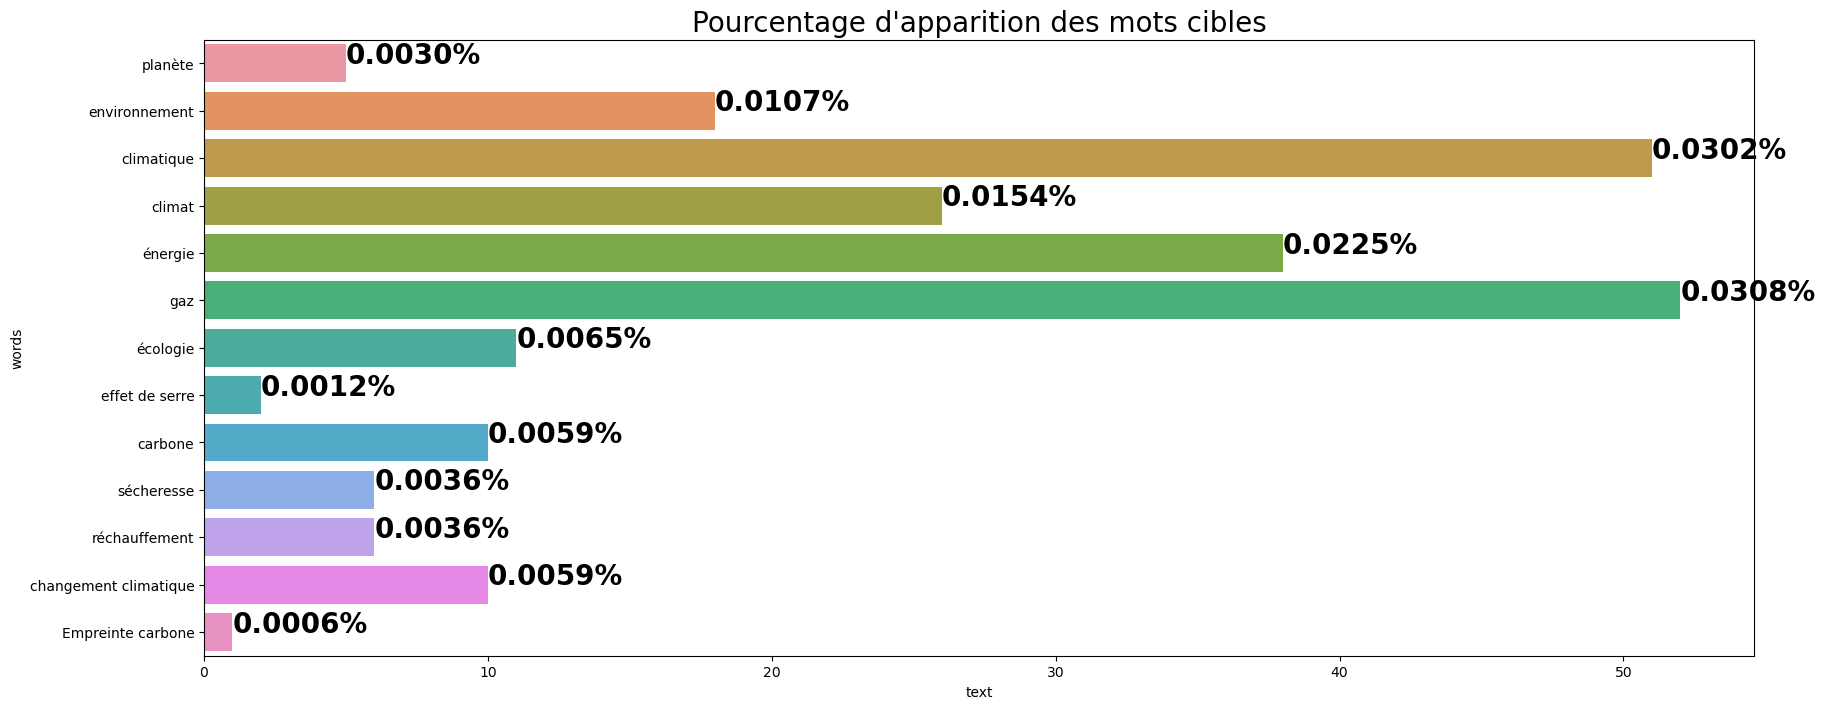

In [57]:
bar_plot("text","words",df_count)

In [42]:
# Apparition des mots clés sur le nombre d'articles
def bar_plot(x,y,data):
    ax, fig = plt.subplots(figsize=(20,8)) 
    ax = sns.barplot(y=y, x=x, data=df_count)
    ax.set_title("Pourcentage d'apparition des mots cibles",fontsize=20)


    for p in ax.patches:
        percentage = '{:.4f}%'.format(100 * p.get_width()/len(df["text"]))
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')

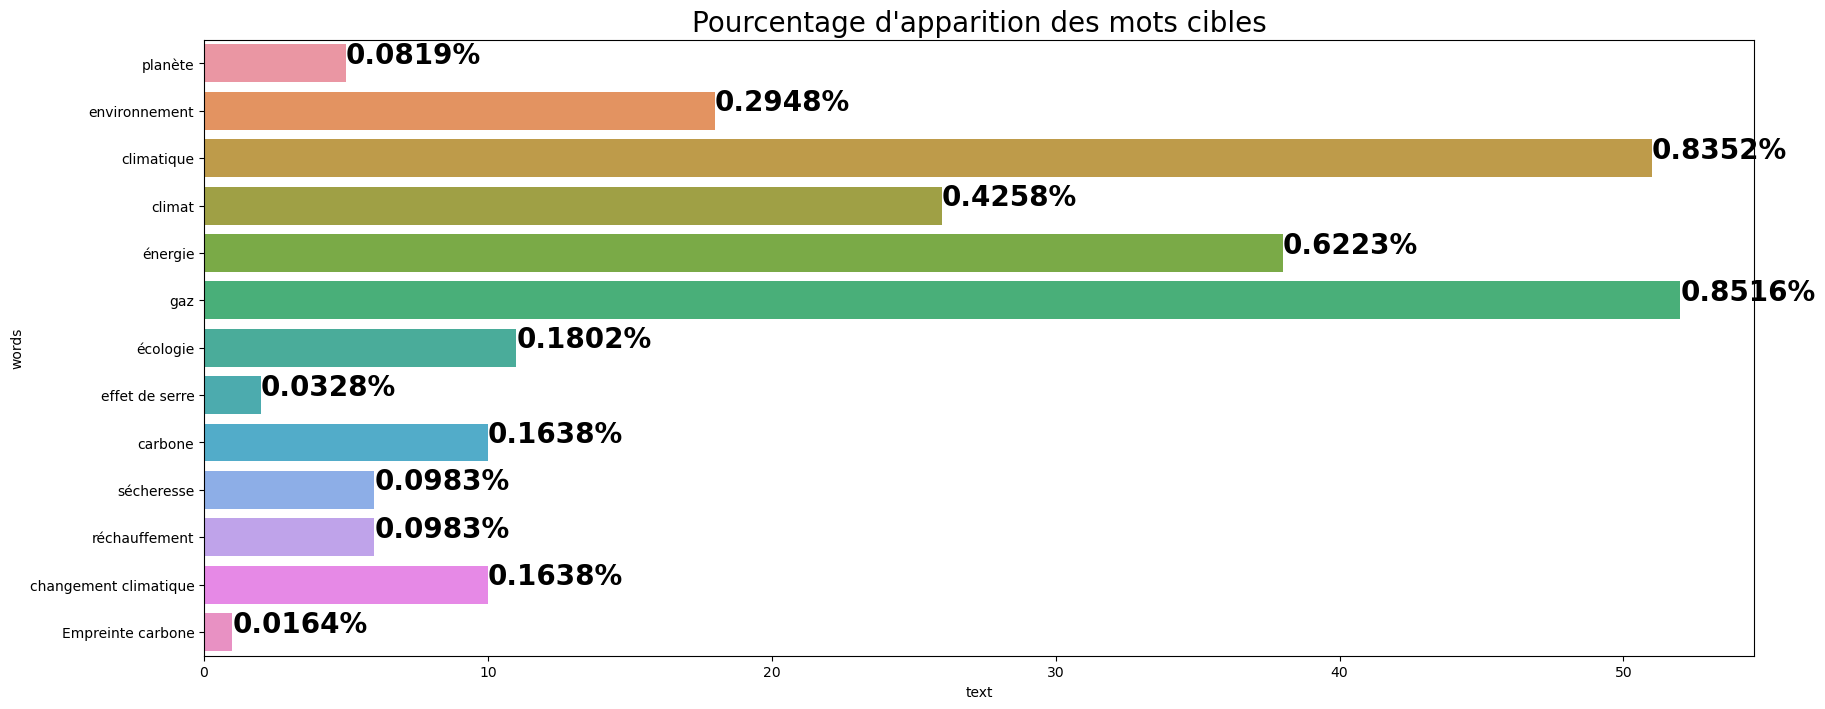

In [43]:
bar_plot("text","words",df_count)

comparaison avec d'autres topic

In [92]:
df.media.unique()

array(['lemonde'], dtype=object)

In [235]:
def plot_comp(df, keywords_climat, keywords_politique):
    df_keywords_climat=df[df.news_title.str.contains("|".join(keywords_climat))]
    df_climat = round((df_keywords_climat.groupby("media").count() / df.groupby(["media"]).count()).news_title
        * 100,2,).reset_index()
    df_climat= df_climat[["media","news_title"]]
    df_climat["keyword list"] = "climat"
    df_keywords_politique=df[df.news_title.str.contains("|".join(keywords_politique))]
    df_politique = round((df_keywords_politique.groupby("media").count() / df.groupby(["media"]).count()).news_title
        * 100,2,).reset_index()
    df_politique= df_politique[["media","news_title"]]
    df_politique["keyword list"] = "politique"
    df_to_plot = pd.concat([df_climat, df_politique])
    fig = px.bar(
        df_to_plot,
        x="media",
        y="news_title",
        color="keyword list",
        title="Pourcentage de titre d'articles contenant un mot des listes"
    )
    fig.show()
plot_comp(df,CLIMATE_KW,politique_KW)

Le figaro : 

In [236]:
df_lefigaro=load_data(dir_data2)
df_lefigaro.head()

url  \
44619.0000  https://www.lefigaro.fr/actualite-france/on-emmerde-les-honnetes-gens-ces-francais-qui-refusent-d-abandonner-leurs-armes-transmises-de-pere-en-fils-20221201   
44620.0000                                                https://www.lefigaro.fr/flash-actu/washington-approuve-la-vente-a-la-finlande-de-missiles-antiaeriens-20221201   
44621.0000                                         https://www.lefigaro.fr/flash-actu/les-talibans-interdisent-d-emettre-le-service-afghan-de-radio-free-europe-20221201   
44622.0000                      https://www.lefigaro.fr/international/rome-place-sous-tutelle-d-etat-provisoire-une-raffinerie-du-geant-russe-loukoil-en-italie-20221201   
44623.0000                                                            https://www.lefigaro.fr/societes/le-collectionnist-l-airbnb-du-luxe-veut-couvrir-le-monde-20221201   

                          news        news_publication publication_name  \
44619.0000  \n                  \n                            Le Figaro   
44620.0000  \n                  \n                            Le Figaro   
44621.0000  \n                  \n                            Le Figaro   
44622.0000  \n                  \n                            Le Figaro   
44623.0000  \n                  \n                            Le Figaro   

           publication_language news_publication_date  \
44619.0000                   fr   2022-12-01 08:36:00   
44620.0000                   fr   2022-12-01 23:29:49   
44621.0000                   fr   2022-12-01 23:48:57   
44622.0000                   fr   2022-12-01 21:55:00   
44623.0000                   fr   2022-12-01 17:28:46   

                                                                                                                news_title  \
44619.0000  «On emmerde les honnêtes gens» : ces Français qui refusent d'abandonner leurs armes transmises de père en fils   
44620.0000                                              Washington approuve la vente à la Finlande de missiles antiaériens   
44621.0000                                       Les talibans interdisent d'émettre le service afghan de Radio Free Europe   
44622.0000                             L'Italie place sous tutelle d'État provisoire une raffinerie du géant russe Loukoïl   
44623.0000                                                      Le Collectionnist, l’Airbnb du luxe, veut couvrir le monde   

                                                                                                                                                                                                                                                                                  news_keywords  \
44619.0000                           arme à feu, ministère de l'Intérieur, Actualité, actualité France, société, actualité société, société française, éducation, actualité éducation, actualité justice, justice, faits divers, sécurité, actualité sécurité, immigration, violence, polémique   
44620.0000                                                                                          États-Unis, Finlande, Flash, Flash Actu, Fil, Fil info, Breves, Actualite, news, informations, actualités, actu, depeches, nouvelles, infos, France, international, politique, faits divers   
44621.0000                                                                                         Afghanistan, talibans, Flash, Flash Actu, Fil, Fil info, Breves, Actualite, news, informations, actualités, actu, depeches, nouvelles, infos, France, international, politique, faits divers   
44622.0000  Italie, Raffinerie, Actualité économique, entreprises, économie, bourse, emploi, impôts, cac 40, creation d'entreprise, chef d'entreprise, grands patrons, consommation, multinationales, privatisation, délocalisations, concurrence, monopole, crise, bourse, licenciements, unio   
44623.0000                   Luxe, Tourisme, Actions française, Sociétés étrangères, cours des Sociétés françaises, actualité 

In [237]:
df_lefigaro=preprocess(df_lefigaro)

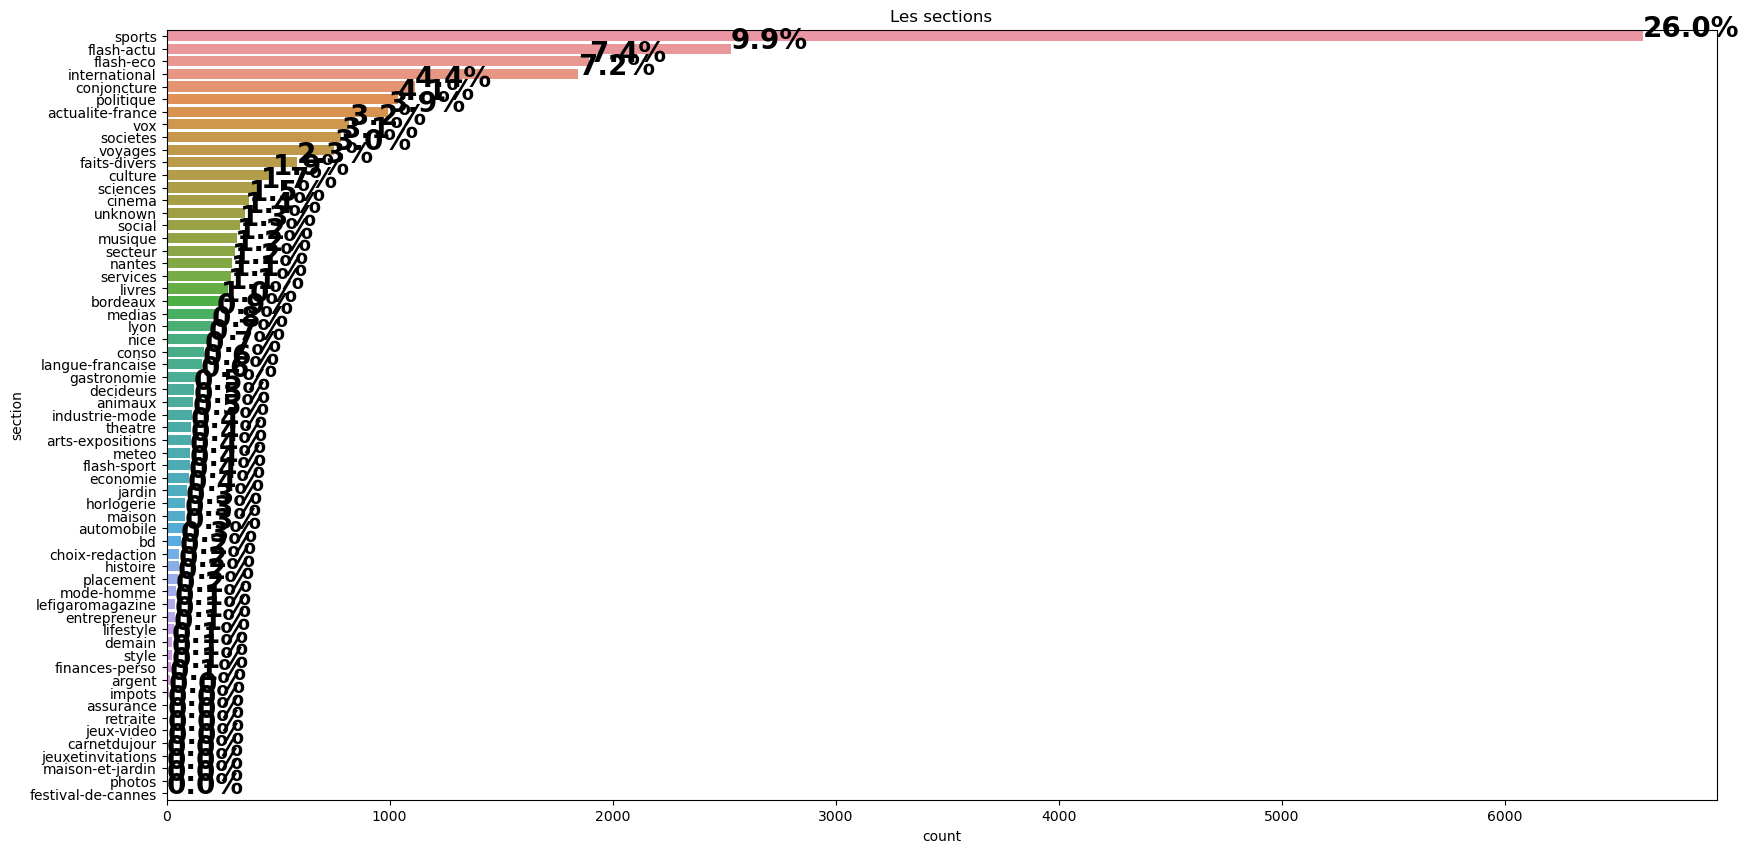

In [72]:
plot_stat(df_lefigaro,"section","Les sections")

In [83]:
df_lefigaro['text']=df_lefigaro['text'].apply(lambda x : search_words(x))

In [82]:
df_lefigaro[df_lefigaro.section > 'unknown']

url  \
44624.0000                                       https://www.lefigaro.fr/vox/societe/alain-bentolila-pourquoi-tant-d-enfants-ne-savent-pas-lire-20221201   
44659.0000     https://www.lefigaro.fr/voyages/reouverture-du-terminal-1-de-l-aeroport-paris-charles-de-gaulle-ce-qui-change-pour-les-voyageurs-20221201   
44687.0000           https://www.lefigaro.fr/voyages/a-montauban-le-festival-des-lanternes-nous-emmene-en-chine-en-totale-autonomie-energetique-20221201   
44710.0000  https://www.lefigaro.fr/vox/societe/aurelie-jean-depassionnons-les-debats-autour-de-la-corrida-en-utilisant-la-methode-scientifique-20221201   
44720.0000      https://www.lefigaro.fr/voyages/conseils/coupe-du-monde-au-qatar-petit-precis-de-bonnes-manieres-a-l-usage-du-visiteur-etranger-20221201   
...                                                                                                                                                  ...   
NaN                                            https://www.lefigaro.fr/voyages/guides/que-voir-que-faire-a-venise-les-activites-incontournables-20230218   
NaN                                          https://www.lefigaro.fr/voyages/hotels/hotel-constance-lemuria-a-praslin-l-avis-d-expert-du-figaro-20230218   
NaN                                      https://www.lefigaro.fr/voyages/montagne/ski-de-randonnee-tout-ce-qu-il-faut-savoir-avant-de-se-lancer-20201227   
NaN                  https://www.lefigaro.fr/voyages/sculptures-d-agrumes-corsos-et-rock-n-roll-notre-guide-de-la-fete-du-citron-de-menton-2023-20230218   
NaN                                             https://www.lefigaro.fr/voyages/conseils/randonnee-avec-les-enfants-les-cles-pour-que-ca-marche-20220629   

           news_publication_date  \
44624.0000   2022-12-01 15:47:28   
44659.0000   2022-12-01 13:26:00   
44687.0000   2022-12-01 07:30:00   
44710.0000   2022-12-01 12:02:14   
44720.0000   2022-12-01 07:00:00   
...                          ...   
NaN          2023-02-18 11:00:00   
NaN          2023-02-18 10:00:00   
NaN          2023-02-18 09:00:00   
NaN          2023-02-18 08:30:00   
NaN          2023-02-18 07:00:00   

                                                                                                     news_title  \
44624.0000                                       Alain Bentolila : «Pourquoi tant d'enfants ne savent pas lire»   
44659.0000   Réouverture du terminal 1 de l'aéroport Paris-Charles de Gaulle : ce qui change pour les voyageurs   
44687.0000          À Montauban, le Festival des Lanternes nous emmène en Chine en totale autonomie énergétique   
44710.0000  Aurélie Jean : «Dépassionnons les débats autour de la corrida en utilisant la méthode scientifique»   
44720.0000             Coupe du monde au Qatar : petit précis de bonnes manières à l'usage du visiteur étranger   
...                                                                                                         ...   
NaN                                                Que voir, que faire à Venise : les activités incontournables   
NaN                                                Hôtel Constance Lemuria à Praslin, l'avis d'expert du Figaro   
NaN                                                                   Ski de randonnée: le guide pour se lancer   
NaN               Sculptures d'agrumes, corsos et rock'n'roll : notre guide de la Fête du Citron de Menton 2023   
NaN                                 Vacances à la montagne : les clés pour faire aimer la randonnée aux enfants   

                                                                                                                                                             image_caption  \
44624.0000           «Un enfant ne peut apprendre efficacement  à lire et à écrire dans une langue qu'il maîtrise  mal ou pas dans son vocabulaire, et dans sa grammaire.»   
44659.0000                                          Les capacités d'accueil du terminal historique de l'aéroport P

In [241]:
df=pd.concat([df, df_lefigaro], ignore_index=True)

In [245]:
missing_values(df)

Variable    nan      %nan
4                   etag  76365  92.5962%
0                    url      0   0.0000%
1  news_publication_date      0   0.0000%
2             news_title      0   0.0000%
3          image_caption      0   0.0000%
5          download_date      0   0.0000%
6                  media      0   0.0000%
7                section      0   0.0000%
8                   text      0   0.0000%

In [244]:
plot_comp(df,CLIMATE_KW,politique_KW)

- La suite est de concaténer tout les médias sur un seul dataset et l'explorer et puis remettre le tout sur le dashboard